In [3]:
#Part. 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load data set from the local
df = pd.read_csv(r'C:/Users/withm/OneDrive/Desktop/DTSC 710 (Fri)/Homework/hw3/BostonHousing.csv')
print(df)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [9]:
# fill missing values by the mean of the corresponding column
missing = df.isnull().sum()
if missing.any():
    df = df.fillna(df.mean())

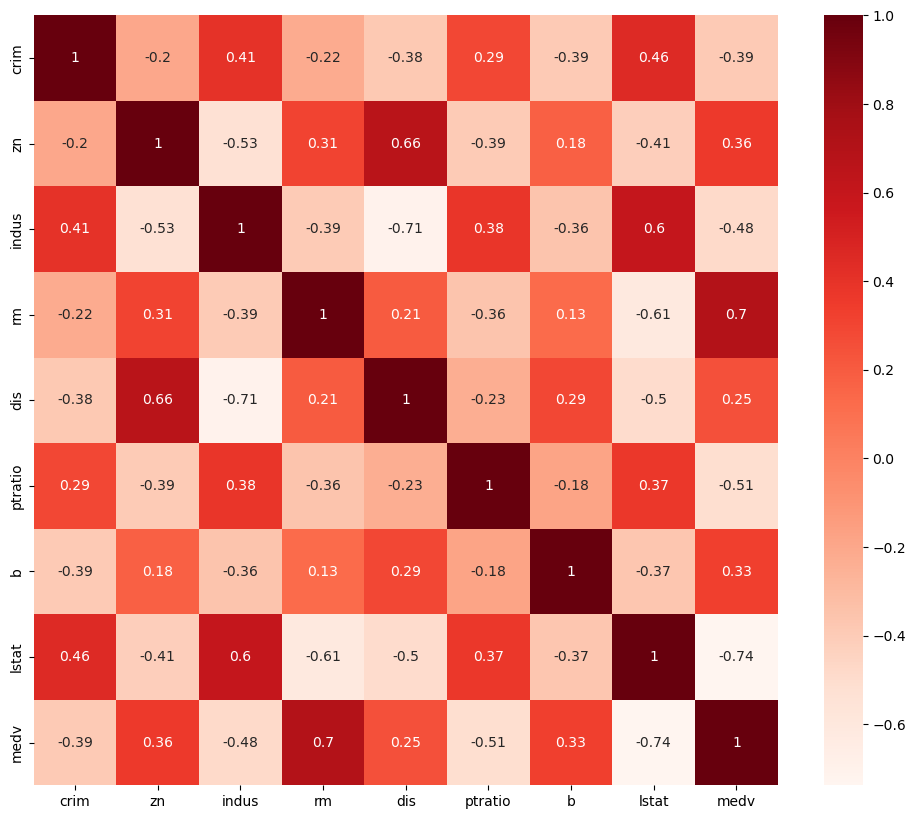

In [11]:
# calculate correlation matrix and plot heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()
# The variables 'chas', 'nox', 'age', and 'rad' do not appear in the heatmap because they are categorical, not continuous variables

In [13]:
# remove one of two highly correlated variables
corr_threshold = 0.7
corr_cols = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i,j]) > corr_threshold:
            col_i = corr.columns[i]
            col_j = corr.columns[j]
            if abs(corr[col_i]['medv']) > abs(corr[col_j]['medv']):
                corr_cols.add(col_j)
            else:
                corr_cols.add(col_i)

In [15]:
# drop columns that have no correlation with dependent variable
no_corr_cols = ['rm', 'ptratio', 'lstat'] + list(corr_cols)
df.drop(no_corr_cols, axis=1, inplace=True)

In [16]:
# print updated data frame
print(df)

        crim    zn  indus       b  medv
0    0.00632  18.0   2.31  396.90  24.0
1    0.02731   0.0   7.07  396.90  21.6
2    0.02729   0.0   7.07  392.83  34.7
3    0.03237   0.0   2.18  394.63  33.4
4    0.06905   0.0   2.18  396.90  36.2
..       ...   ...    ...     ...   ...
501  0.06263   0.0  11.93  391.99  22.4
502  0.04527   0.0  11.93  396.90  20.6
503  0.06076   0.0  11.93  396.90  23.9
504  0.10959   0.0  11.93  393.45  22.0
505  0.04741   0.0  11.93  396.90  11.9

[506 rows x 5 columns]


In [18]:
# Part. 2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into training and testing sets (8:2)
X_train, X_test, y_train, y_test = train_test_split(df.drop('medv', axis=1), df['medv'], test_size=0.2, random_state=42)

In [19]:
# Train model with all remaining variables
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# Perform 10 Fold Cross Validation
cv_scores = np.sqrt(-cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

In [21]:
# Report mean and SD of RMSE
print("Mean RMSE:", cv_scores.mean())
print("SD of RMSE:", cv_scores.std())

Mean RMSE: 7.910002599277938
SD of RMSE: 0.9236315680565205


In [22]:
# Part. 3

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset from the given URL
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Create principal components for features
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

In [24]:
# Part. 4

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Fit the model using (k) Principal Components
k = 5
pca_features = df_pca[:, :k]
target = df['medv']
linreg = LinearRegression()
scores = -1 * cross_val_score(linreg, pca_features, target, cv=10, scoring='neg_mean_squared_error')

# Report mean of RMSE
rmse_mean = np.mean(np.sqrt(scores))
print("Mean RMSE:", rmse_mean)

# Report SD of RMSE
rmse_std = np.std(np.sqrt(scores))
print("SD of RMSE:", rmse_std)

Mean RMSE: 3.1471252360222124
SD of RMSE: 1.7028934064685237


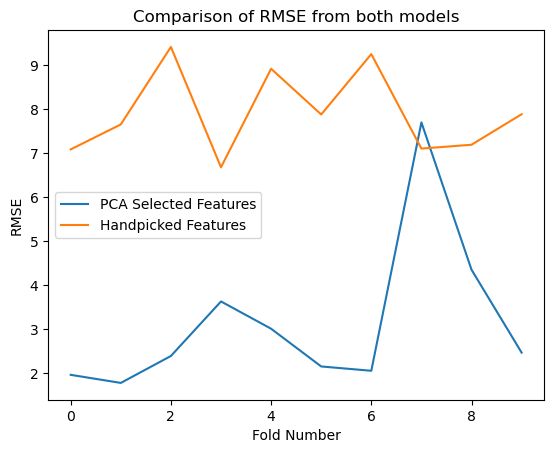

In [27]:
# Part. 5

import matplotlib.pyplot as plt

# RMSE from PCA selected features
pca_rmse = np.sqrt(scores)

# RMSE from handpicked features
handpicked_rmse = cv_scores

# Plot the RMSE from both models
plt.plot(pca_rmse, label='PCA Selected Features')
plt.plot(handpicked_rmse, label='Handpicked Features')
plt.title("Comparison of RMSE from both models")
plt.xlabel("Fold Number")
plt.ylabel("RMSE")
plt.legend()
plt.show()

As we can see above graph, PCA model had the best accuracy except one case that fold number is 7.